In [2]:
import sys

sys.path.insert(0,'/home/jcdn500/Documents/Apenunga/Fortran/Parallel/')
print(sys.path)

import numpy as np
import apenunga_library
import matplotlib.pyplot as plt
from abtem.potentials import Potential
from abtem.waves import FresnelPropagator

['/home/jcdn500/Documents/Apenunga/Fortran/Parallel/', '/home/jcdn500/Documents/abTEM', '/home/jcdn500/Documents/Apenunga/Fortran/Parallel', '/home/jcdn500/Documents/abTEM', '/home/jcdn500/Documents/EDMFTF-Apr2021/bin', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/jcdn500/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/jcdn500/.local/lib/python3.8/site-packages/IPython/extensions', '/home/jcdn500/.ipython']


/home/jcdn500/.local/lib/python3.8/site-packages/ase/calculators/neighborlist.py:5: UserWarning: Moved to ase.neighborlist
  warnings.warn('Moved to ase.neighborlist')


In [2]:
Input = apenunga_library.Input('/home/jcdn500/Documents/Apenunga/Fortran/Parallel/inputML50_Fe_BCC_GHNGPN.in',zperiodic=True,neib=1)
H = Input.Hamiltonian(step_size=0.1,hermitian=False) 
eVals_full,eVecs_fullL,eVecs_fullR = apenunga_library.diagonalize_function(H)

/home/jcdn500/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


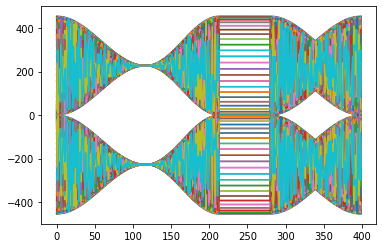

In [3]:
plt.plot(eVals_full)
plt.show()

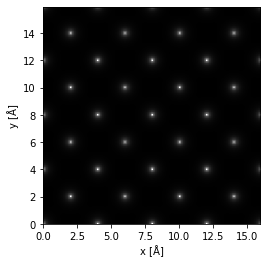

In [3]:
potential = Potential(Input.aseatoms*(4, 4, 1), sampling=.05, parametrization='kirkland')
potential.project().show();

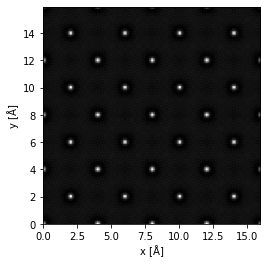

In [5]:
from abtem.waves import PlaneWave
from abtem.waves import Waves

wave = PlaneWave(energy=300e3)

wave.grid.match(potential)

wave = wave.build()

propagator = FresnelPropagator()

for potential_slice in potential:
    potential_slice.transmit(wave)
    
    #### Bit to change wave.
    
    ## get an array version of your wave as wave temp do any changes you need on it.
    #waveTemp=wave._array    
    
    ## write it back to a wave object
    #wave = Waves(waveTemp, extent=wave.extent, energy=wave.energy)
    #####

    
    #### Bit to change wave.
    
    ## get an array version of your wave as wave temp do any changes you need on it.
    wave._array=wave._array*1    
       
    #####
    
    propagator.propagate(wave, potential_slice.thickness)

changed=wave._array
    
wave.show();

In [11]:
for num,i in enumerate(potential):
    print(num,np.shape(i._array))

0 (1, 320, 320)
1 (1, 320, 320)
2 (1, 320, 320)
3 (1, 320, 320)
4 (1, 320, 320)
5 (1, 320, 320)
6 (1, 320, 320)
7 (1, 320, 320)
8 (1, 320, 320)
9 (1, 320, 320)
10 (1, 320, 320)
11 (1, 320, 320)
12 (1, 320, 320)
13 (1, 320, 320)
14 (1, 320, 320)
15 (1, 320, 320)
16 (1, 320, 320)
17 (1, 320, 320)
18 (1, 320, 320)
19 (1, 320, 320)
20 (1, 320, 320)
21 (1, 320, 320)
22 (1, 320, 320)
23 (1, 320, 320)
24 (1, 320, 320)
25 (1, 320, 320)
26 (1, 320, 320)
27 (1, 320, 320)
28 (1, 320, 320)
29 (1, 320, 320)
30 (1, 320, 320)
31 (1, 320, 320)
32 (1, 320, 320)
33 (1, 320, 320)
34 (1, 320, 320)
35 (1, 320, 320)
36 (1, 320, 320)
37 (1, 320, 320)
38 (1, 320, 320)
39 (1, 320, 320)
40 (1, 320, 320)
41 (1, 320, 320)
42 (1, 320, 320)
43 (1, 320, 320)
44 (1, 320, 320)
45 (1, 320, 320)
46 (1, 320, 320)
47 (1, 320, 320)
48 (1, 320, 320)
49 (1, 320, 320)
50 (1, 320, 320)
51 (1, 320, 320)
52 (1, 320, 320)
53 (1, 320, 320)
54 (1, 320, 320)
55 (1, 320, 320)
56 (1, 320, 320)
57 (1, 320, 320)
58 (1, 320, 320)
59 (1, 

Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder
Place Holder

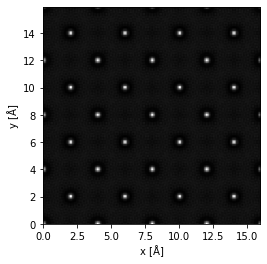

In [7]:
from abtem.waves import PlaneWave
from abtem.waves import Waves

wave = PlaneWave(energy=300e3)

wave.grid.match(potential)

wave = wave.build()

propagator = FresnelPropagator()

for potential_slice in potential:
    potential_slice.transmit(wave)
    potential_slice.magnon_inelastic(wave)
    propagator.propagate(wave, potential_slice.thickness)

unchanged=wave._array
    

wave.show();

In [8]:
np.all(changed==unchanged)

True

In [9]:
wave = PlaneWave(energy=300e3)
wave.grid.match(potential)
wave = wave.build()
wave = Waves(wave._array*2, extent=wave.extent, energy=wave.energy)

In [10]:
wave.extent[0]

16.0

In [11]:
wave._array

gradientX=np.gradient(wave._array,wave.extent[0],axis=0)
gradientY=np.gradient(wave._array,wave.extent[1],axis=1)

gradientX2=np.gradient(gradientX,pixelX,axis=0)
gradientY2=np.gradient(gradientY,pixelY,axis=1)

NameError: name 'pixelX' is not defined

## Iron BCC ##

In [11]:
Input = apenunga_library.Input('./input_Fe_BCC_GHNGPN.in',zperiodic=False,neib=1)
H = Input.Hamiltonian(step_size=0.1,hermitian=False) 
eVals_full,eVecs_fullL,eVecs_fullR = apenunga_library.diagonalize_function(H)

In [12]:
print(H[:,:,0])

[[ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]


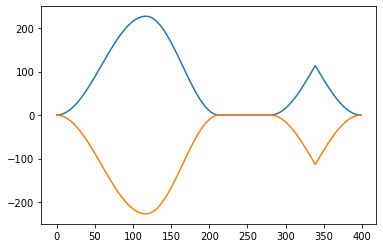

In [13]:
plt.plot(eVals_full)